In [12]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import re
from kornounextractor.noun_extractor import extract
import konlpy.tag
from collections import Counter 
from ckonlpy.tag import Twitter
from kr_sna import do_kr_sna
import nltk
import networkx as nx
import itertools
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import requests
from ckonlpy.tag import Twitter
import konlpy.tag
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from kornounextractor.noun_extractor import extract
from kr_sna import do_kr_sna
from matplotlib import rcParams
import matplotlib.font_manager as fm
import itertools

In [2]:
#### 인터넷 뉴스 기사를 추출하는 함수 생성
def get_article(url):
    r = urllib.request.urlopen(url)
    soup = BeautifulSoup(r.read(), 'lxml')
    news_content = soup.find('div', attrs = {'class':'article_txt'}).text
    news_content = news_content.strip()
    return news_content

In [3]:
#기사내용 읽어오는 함수
def get_article(url):
    r=urllib.request.urlopen(url)
    soup = BeautifulSoup(r.read(), 'lxml')
    news_content = soup.find('div', attrs = {'class':'article_txt'}).text
    #텍스트전처리
    news_content=news_content.strip()
    filtered_content=re.sub(r'[^\s\d\w\.\?\!\,]','',news_content)
    return filtered_content

In [4]:
with open('url_donga.txt','r',encoding='utf8') as f:
    full_content_da=[]
    for i in f.readlines():
           da = i.strip()
           content_da = get_article(da)
           filtered_content_da = re.sub(r'[^\s\d\w\.\?\!\,]',' ',content_da)
           full_content_da.append(filtered_content_da)

In [5]:
with open('content_donga','w', encoding='utf8') as f:
    f.write(str(full_content_da))
    f.close()

In [6]:
## 빈도분석을 위한 함수 생성
def cntWord(text , n = None):
    ## ckonlpy를 이용
    twitter = Twitter()
    
    ## 포스 태깅
    twitter_morphs = twitter.pos(text)
    ## 명사 동사 형용사만 추출
    Noun_words = []
    for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
        if pos == 'Noun':
            Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
    stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','동아','연합뉴스','donga','com','kr',
                 '기사','이사장','자사고','홍성대','학교','심정','일반','동시','선발']
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
    for word in unique_Noun_words:
        if len(word)==1:
            while word in Noun_words: 
                Noun_words.remove(word)
    c = Counter(Noun_words)
    if n == None:
        return c.most_common(len(c))
    else:
        return c.most_common(n)

In [7]:
print(cntWord(str(full_content_da),100))

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('미세먼지', 3245), ('베트남', 1658), ('추천', 1195), ('중국', 1134), ('강타', 1081), ('동남아', 1077), ('매직', 1075), ('축구', 1074), ('박항서', 1073), ('점령', 1073), ('서울', 1045), ('한국', 1012), ('의심', 1004), ('정부', 990), ('공기', 792), ('농도', 788), ('세계', 748), ('포함', 697), ('교육', 691), ('보고', 659), ('오늘', 639), ('내일', 622), ('주요', 619), ('약속', 612), ('관중', 599), ('상대', 589), ('리자', 586), ('인적', 585), ('열정', 584), ('단행', 583), ('배하', 582), ('억울', 581), ('현역', 581), ('포효', 580), ('지면', 580), ('박용', 579), ('쇄신', 579), ('김무성', 579), ('최경환', 579), ('최영미', 579), ('성추행', 579), ('얼려버', 579), ('불타', 579), ('베스트', 572), ('지역', 569), ('심해', 537), ('증폭', 494), ('집착', 493), ('력성', 493), ('환경', 493), ('위해', 483), ('제품', 474), ('때문', 468), ('마스크', 463), ('사용', 453), ('차량', 431), ('수준', 420), ('실내', 419), ('시간', 416), ('정책', 405), ('시장', 404), ('서울시', 400), ('통해', 399), ('전국', 399), ('초미세먼지', 392), ('관리', 383), ('문제', 382), ('기준', 380), ('이상', 379), ('관련', 377), ('효과', 368), ('물질', 366), ('발생', 357), ('사업', 350), ('대한', 3

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


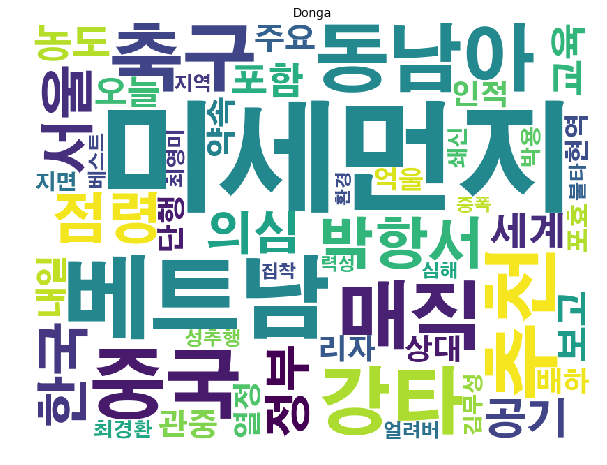

In [13]:
whole_text=" ".join(str(x) for x in full_content_da)

tags = cntWord(whole_text,50)
font_path = 'C:\Windows\Fonts\H2GTRE.TTF'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.title('Donga')
plt.imshow(cloud)

In [ ]:
## 네트워크의 노드를 구성할 단어 선택
subject = ['미세먼지']
korea = ['한국','내륙','차량','대통령','안개','석탄','시설']
china = ['중국','남해','서해','앞바다', '바람']
list_of_words = subject + korea + china

In [ ]:
def netwk(content, sword):
    stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','한겨례','연합뉴스','com','kr']
    from konlpy.tag import Komoran
    komoran= Komoran()
    
    Nouns = komoran.nouns(content)
    final_nouns = Nouns.copy()
    unique_nouns = set(Nouns)
    
    for word in unique_nouns:
        if len(word) == 1:
            while word in final_nouns:
                final_nouns.remove(word)
        if word in stopwords:
            while word in final_nouns:
                final_nouns.remove(word)
                
    g = do_kr_sna(content, final_nouns, stopwords,list_of_words = list_of_words, userdic= False)
    
    yghDict = dict(g[sword])
    
    cntlst = []
    for k in yghDict.keys():
        cntlst.append([k,yghDict[k]['weight']])
    
    return sorted(cntlst, key= lambda x : -x[1])

In [ ]:
stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','동아','연합뉴스','com','kr']

In [ ]:
twitter = Twitter()
    
    ## 포스 태깅
twitter_morphs = twitter.pos(whole_text)
    ## 명사 동사 형용사만 추출
Noun_words = []
for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
    if pos == 'Noun':
        Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
for word in unique_Noun_words:
    if len(word)==1:
        while word in Noun_words: 
            Noun_words.remove(word)

In [ ]:
c = Counter(Noun_words)
if list_of_words == None:
    list_of_words = get_words_list(c.most_common(num))

In [ ]:
text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', whole_text.replace('\n', ' '))
text2 = re.sub(r'([\.\?\!])',r'\1 ', text1)

In [ ]:
article_sentences = re.split(r'[\.\?\!]\s+', text2)

In [ ]:
G = nx.Graph()
G.add_nodes_from(list_of_words)

In [ ]:
for sentence in article_sentences:
    twitter = Twitter()
    
    ## 포스 태깅
    twitter_morphs = twitter.pos(sentence)
    ## 명사 동사 형용사만 추출
    sen_Noun_words = []
    for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
        if pos == 'Noun':
            sen_Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
    sen_unique_Noun_words = set(sen_Noun_words)
    for word in sen_unique_Noun_words:
        if word in stopwords:
            while word in sen_Noun_words: sen_Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
    for word in sen_unique_Noun_words:
        if len(word)==1:
            while word in sen_Noun_words: 
                sen_Noun_words.remove(word)
    NN_words=sen_Noun_words
    
    selected_words =[]
    for noun in set(NN_words):
        if noun in list(G.nodes()):
            selected_words.append(noun)

    for pair in list(itertools.combinations(list(selected_words), 2)):
        if pair[0] == pair[1]:
            continue
        if pair in G.edges(): 
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1 )

In [ ]:
yghDict = dict(G['미세먼지'])
    
    
cntlst = []
for k in yghDict.keys():
    cntlst.append([k,yghDict[k]['weight']])

In [ ]:
sorted(cntlst, key= lambda x : -x[1])

In [ ]:
plt.title('Donga')
rcParams['font.family'] = 'Noto Sans Korean'
font_name = 'Malgun Gothic'
pos=nx.shell_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=10)